In [1]:
import numpy as np
from photutils import DAOStarFinder
from photutils import datasets
from photutils.background import MedianBackground
import glob
from astropy.stats import mad_std
from photutils import CircularAnnulus
import matplotlib.pyplot as plt
from photutils.psf import BasicPSFPhotometry, DAOGroup, IntegratedGaussianPRF
from astropy.modeling.fitting import LevMarLSQFitter

    ### PHOTOMETRY

In [2]:

hdu = datasets.load_star_image('../Downloads/quadRU.fits')    

In [3]:
image = hdu.data[200:380, 0:300].astype(float)    
image -= np.median(image)  
image_max = np.max(image)
bkg_sigma = mad_std(image)   
daofind = DAOStarFinder(fwhm=4., threshold=6.*bkg_sigma)    
sources = daofind(image)    
print(sources)

 id     xcentroid      ...        flux                mag         
--- ------------------ ... ------------------ --------------------
  1 109.04780057697083 ...  8.241434975711115  -2.2900070910676535
  2 234.80529395716465 ...  5.599599100399195  -1.8703923377311846
  3 166.81700070472158 ...  2.353916090445154  -0.9294774439467985
  4  257.9055560424207 ...  2.670510636225505   -1.066485780088715
  5 224.33959045286252 ...  5.741849812161949  -1.8976295714973723
  6  169.4017673580097 ... 1.4843965347628592 -0.42887482960697193
  7 265.27759260829237 ... 2.7533209133992096  -1.0996420838737535
  8 48.165899253516805 ...  7.948591514485474  -2.2507254468990983
  9  270.7415882818899 ...  5.862712343676264   -1.920246464688139
 10  97.20594826437288 ...   2.34534601428415   -0.925517310600812
...                ... ...                ...                  ...
 77 36.925031837658494 ...  2.722379672581145  -1.0873717332927748
 78  291.3107441097817 ... 1.7157430906157969  -0.586130646600

In [4]:
for col in sources.colnames:
    sources[col].info.format = '%.8g'  # for consistent table output
    print(sources)    

 id     xcentroid      ...        flux                mag         
--- ------------------ ... ------------------ --------------------
  1 109.04780057697083 ...  8.241434975711115  -2.2900070910676535
  2 234.80529395716465 ...  5.599599100399195  -1.8703923377311846
  3 166.81700070472158 ...  2.353916090445154  -0.9294774439467985
  4  257.9055560424207 ...  2.670510636225505   -1.066485780088715
  5 224.33959045286252 ...  5.741849812161949  -1.8976295714973723
  6  169.4017673580097 ... 1.4843965347628592 -0.42887482960697193
  7 265.27759260829237 ... 2.7533209133992096  -1.0996420838737535
  8 48.165899253516805 ...  7.948591514485474  -2.2507254468990983
  9  270.7415882818899 ...  5.862712343676264   -1.920246464688139
 10  97.20594826437288 ...   2.34534601428415   -0.925517310600812
...                ... ...                ...                  ...
 77 36.925031837658494 ...  2.722379672581145  -1.0873717332927748
 78  291.3107441097817 ... 1.7157430906157969  -0.586130646600

In [5]:
from photutils import aperture_photometry, CircularAperture

In [6]:
#Circular Annulus
positions = (sources['xcentroid'], sources['ycentroid'])    
apertures = CircularAnnulus(positions,3,7)    
phot_table = aperture_photometry(image, apertures)    
for col in phot_table.colnames:  
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)  

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1  109.0478 7.8704292    13948.285
  2 234.80529 9.1357869    9508.1805
  3   166.817 9.9122593    4488.6609
  4 257.90556 9.5333305    2160.1615
  5 224.33959  12.42105    49115.053
  6 169.40177 15.176701    5678.8808
  7 265.27759  17.67512    82177.412
  8 48.165899 23.374993    34389.239
  9 270.74159  22.76686    66531.804
 10 97.205948 25.158933     15355.21
...       ...       ...          ...
 78 291.31074 160.98855    10148.729
 79  89.15692 169.54752     459632.7
 80 92.102373 169.49763    465949.54
 81 191.91846 170.35718    42401.327
 82 244.97765  169.4922    34610.908
 83 90.838233 172.66159    461994.43
 84 193.34984 172.14656    53555.247
 85 42.457931 174.26017    58601.067
 86 8.6805691 178.57484    43969.193
 87 153.26871 178.86305    1165.3316
Length = 87 rows


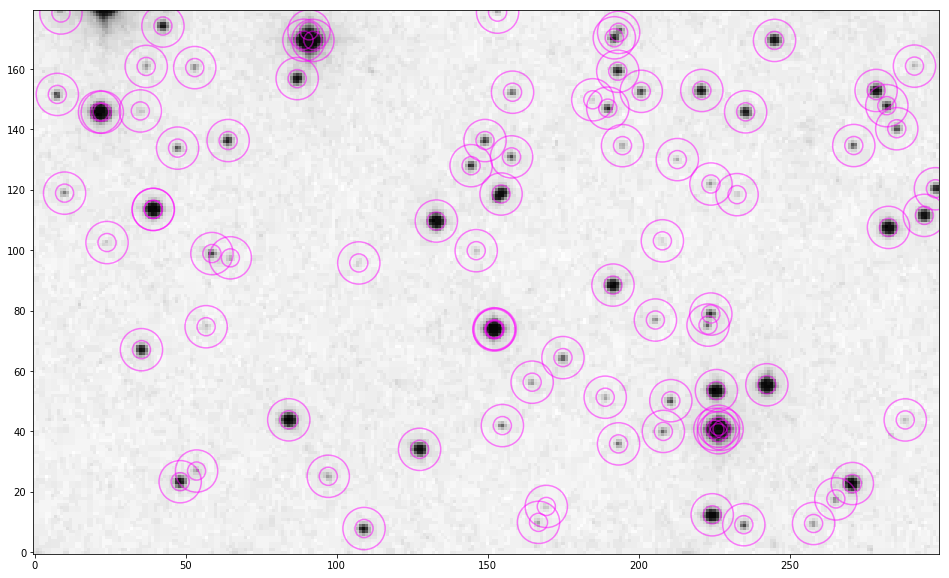

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.imshow(image, cmap='gray_r', origin='lower')
apertures.plot(color='magenta', lw=1.5, alpha=0.5)

In [8]:
#circular Ap
positions1 = (sources['xcentroid'], sources['ycentroid'])    
apertures1 = CircularAperture(positions1,r=5)    
phot_table1 = aperture_photometry(image, apertures1)    
for col in phot_table1.colnames:  
    phot_table1[col].info.format = '%.8g'  # for consistent table output
print(phot_table1)  

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1  109.0478 7.8704292    99902.258
  2 234.80529 9.1357869    45806.902
  3   166.817 9.9122593     14063.18
  4 257.90556 9.5333305    21706.961
  5 224.33959  12.42105       200362
  6 169.40177 15.176701      4879.61
  7 265.27759  17.67512     43227.14
  8 48.165899 23.374993    119363.39
  9 270.74159  22.76686     199959.5
 10 97.205948 25.158933    35494.611
...       ...       ...          ...
 78 291.31074 160.98855    16766.585
 79  89.15692 169.54752    512264.98
 80 92.102373 169.49763    530235.62
 81 191.91846 170.35718    123047.73
 82 244.97765  169.4922    138317.58
 83 90.838233 172.66159    418467.12
 84 193.34984 172.14656    123488.44
 85 42.457931 174.26017    121635.51
 86 8.6805691 178.57484    43835.388
 87 153.26871 178.86305    8933.8086
Length = 87 rows


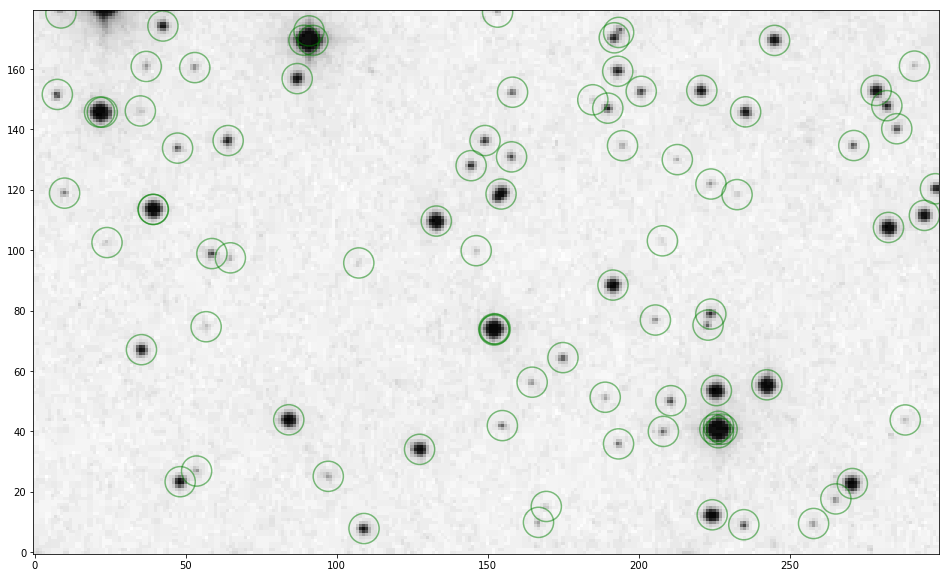

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.imshow(image, cmap='gray_r', origin='lower')
apertures1.plot(color='green', lw=1.5, alpha=0.5)

In [10]:
#trying out something from Mario's class

In [11]:
%matplotlib inline

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=True)

import numpy as np
import math
import matplotlib.pyplot as plt

def makePSF(shape, x0, y0, sigmaPSF):
    # Add a (Gaussian) PSF of width sigmaPSF, centered on (x0, y0)
    xx = np.arange(shape[0]) - shape[0]/2.+0.5
    yy = np.arange(shape[1]) - shape[1]/2.+0.5
    
    r = np.sqrt((xx[:, None]-x0)**2 + (yy[None, :]-y0)**2)
    psf = np.exp(-r**2./2./sigmaPSF) / (2*math.pi*sigmaPSF)
    return psf

def plotCutout(img, title = None, clabel='$counts$', xlabel='x (pixels)', ylabel='y (pixels)', loc=None, fig=None, clim=(200, 400)):
    """Make a nice looking plot of a small image"""
    if loc is None:
        fig, ax = plt.subplots(figsize=(8,8))
        fig.subplots_adjust(right=0.8, bottom=0.34)
    else:
        ax = fig.add_subplot(loc)

    # coordinate of the edge (assuming a square image)
    xe = img.shape[0] // 2.

    if title is None:
        title = "min = %.1f, max=%.1f" % (img.min(), img.max())
    
    ax.set_title(title, fontsize=14)
    plt.imshow(img, origin='lower', interpolation='nearest',
           extent=(-xe, xe, -xe, xe),
           cmap=plt.cm.binary, aspect='auto')
    plt.clim(*clim)
    plt.colorbar().set_label(clabel)

    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

In [12]:
Atrue = 1025.3    # the source count normalization
xdim = 15         # width of the image
ydim = 15         # height of the image
muXtrue = 0.0     # source x centroid 
muYtrue = 0.0     # source y centroid
sigmaPSF = 1.5    # in pixels, corresponds to seeing = 1.5*0.2*2.355 = 0.7 arcsec for LSST (0.2" pix)
skyBg = 250.0     # sky background

In [13]:
def psfPhot(image, Amin = 600, Amax = 1400):
    # Estimate the noise in the image
    sigmaNoise = np.sqrt(image)

    # Subtract the background (we assume we've estimated it somehow)
    image = image - skyBg
    
    sigmaNoise = np.sqrt(skyBg)

    # search for best flux by gridding
    testA = np.arange(Amin, Amax)
    chi2dof = np.empty(testA.shape)
    best = (np.nan, np.inf)
    psf = makePSF(image.shape, 0, 0, sigmaPSF)
    for i, A in enumerate(testA):
        model = A*psf
        chi2 = np.sum(((image-model)/sigmaNoise)**2)
        chi2dof[i] = chi2 / (image.size - 1)
        if chi2dof[i] < best[1]:
            best = (A, chi2dof[i])
    return best[0]
def apPhot(image, r = 3, x0=0, y0=0):
    # Compute the aperture magnitude
    xx = np.arange(image.shape[0]) - image.shape[0]/2.+0.5
    yy = np.arange(image.shape[1]) - image.shape[1]/2.+0.5
    
    rpix = np.sqrt((xx[:, None]-x0)**2 + (yy[None, :]-y0)**2)
    apPhotImage = image - skyBg
    apPhotImage[rpix > r] = 0

    return apPhotImage.sum()

In [14]:
bkg_mean = phot_table['aperture_sum'] /apertures.area()
bkg_sum = bkg_mean * apertures1.area()
final_sum = phot_table1['aperture_sum'] - bkg_sum

#new column
phot_table['sub_aperture_sum'] = final_sum
phot_table['sub_aperture_sum'].info.format = '%.8g'  # for consistent table output


In [15]:
#using the example in the documentation
PSF_model = BasicPSFPhotometry(group_maker = DAOGroup(crit_separation = 10), 
                               bkg_estimator = MedianBackground(), 
                               psf_model = IntegratedGaussianPRF(), 
                               finder = DAOStarFinder(fwhm = 5, threshold = 6 * bkg_sigma, 
                                                      peakmax = image_max - 1000), 
                               fitshape = 7, 
                               fitter = LevMarLSQFitter())

PSF_phot_table = PSF_model.do_photometry(image)
residual_image = PSF_model.get_residual_image()

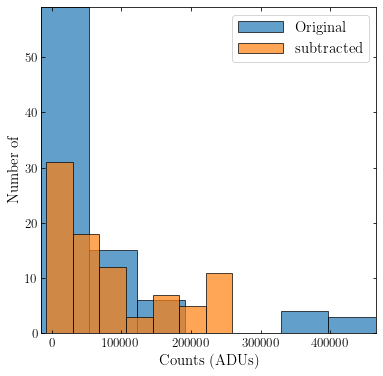

In [16]:
#plt the comparision
plt.figure(figsize = (6, 6))
plt.hist(phot_table['aperture_sum'], bins = 7, alpha = 0.7, label = "Original")
plt.hist(phot_table['sub_aperture_sum'], bins = 7, alpha = 0.7, label = 'subtracted')
plt.xticks(fontsize = 13)
plt.xlabel('Counts (ADUs)')
plt.yticks(fontsize = 13)
plt.ylabel('Number of')
plt.legend()

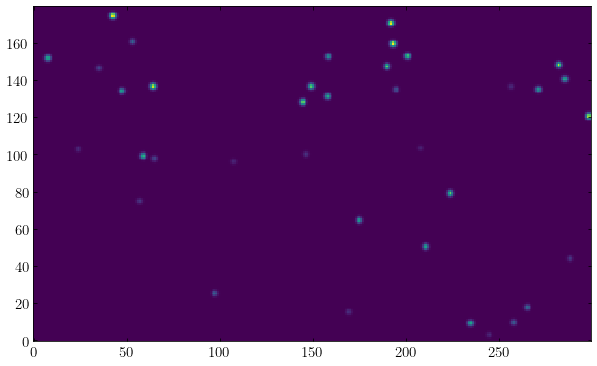

In [17]:
#subtract and plot ther residual img
plt.figure(figsize = (10, 10))
plt.imshow(image - residual_image, origin = 'lower')

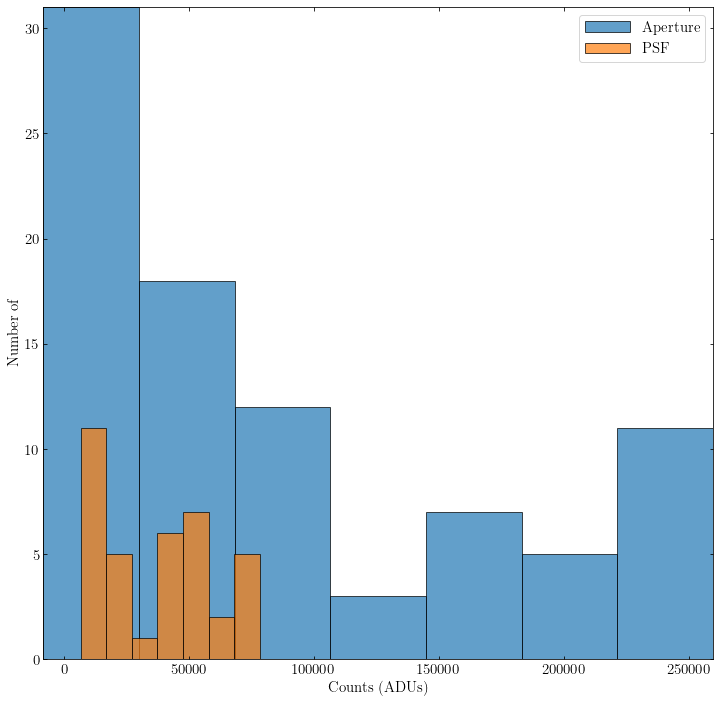

In [18]:
# compare psf and aperture

plt.figure(figsize = (12, 12))
plt.hist(phot_table['sub_aperture_sum'], bins = 7, alpha = 0.7, label = 'Aperture')
plt.hist(PSF_phot_table['flux_fit'], bins = 7, alpha = 0.7, label = 'PSF')
plt.xlabel('Counts (ADUs)')
plt.ylabel('Number of')
plt.legend()